In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


input_size = 28 * 28
hidden_size = 100
num_classes = 10
model = SimpleMLP(input_size, hidden_size, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print("Training finished!")

Epoch 1/5, Loss: 0.1789
Epoch 2/5, Loss: 0.0309
Epoch 3/5, Loss: 0.0183
Epoch 4/5, Loss: 0.1747
Epoch 5/5, Loss: 0.0296
Training finished!


In [2]:
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)
test_data, test_labels = next(iter(test_loader))

model.eval()
with torch.no_grad():

    x = test_data.view(test_data.size(0), -1)
    activations = model.fc1(x)
    activations = model.relu(activations)


print("Activation shape:", activations.shape)
print("Mean activation:", activations.mean().item())
print("Std deviation of activations:", activations.std().item())

Activation shape: torch.Size([1000, 100])
Mean activation: 1.7637478113174438
Std deviation of activations: 2.988523006439209


In [3]:
# WHAT DOES THE MEAN AND STDEV LOOK LIKE BASED ON THE RECENT OUTPUT?

import numpy as np

random_array = np.random.normal(loc=1.8, scale=3, size=10)

print("Generated array:")
print(random_array)
print(f"Array length: {len(random_array)}")
print(f"Mean: {np.mean(random_array):.4f}")
print(f"Standard deviation: {np.std(random_array):.4f}")


Generated array:
[ 1.54760358  0.87618147  2.97753574  0.07119824 -0.70565624  2.83280948
  2.3336423   5.6598247   5.53194129  6.30345597]
Array length: 10
Mean: 2.7429
Standard deviation: 2.3052


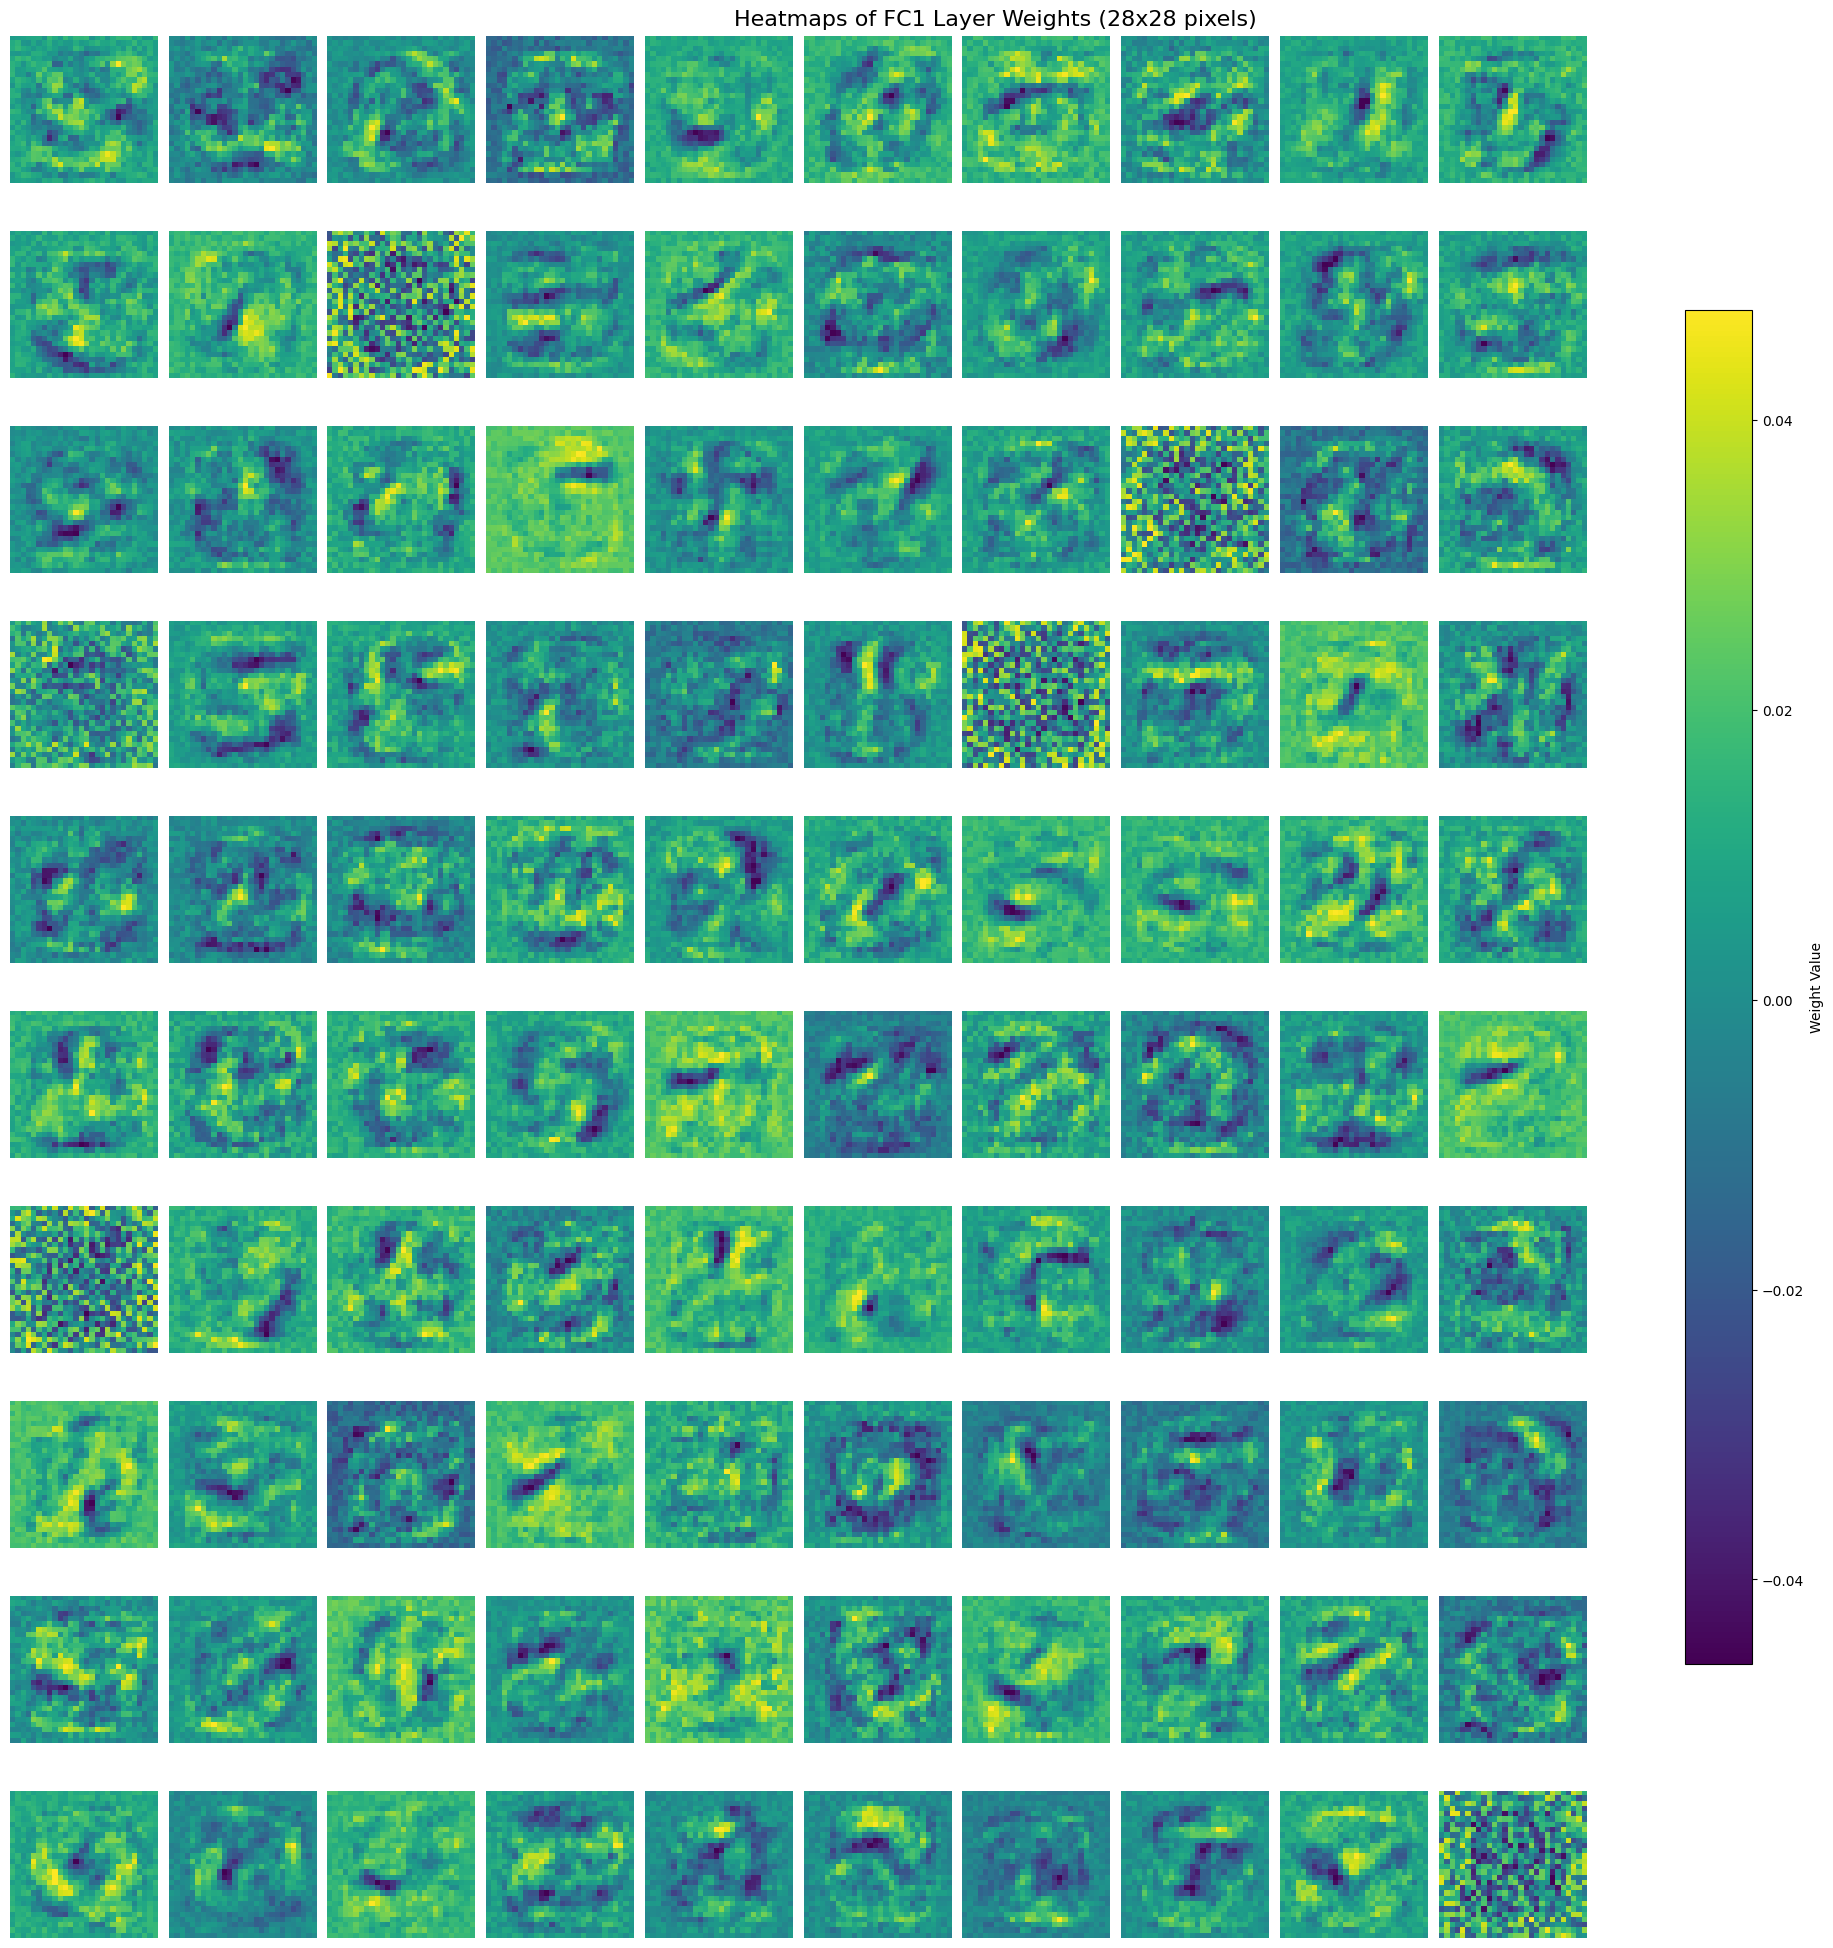

Weight shape: torch.Size([100, 784])
Reshaped weight images shape: torch.Size([100, 28, 28])


In [6]:
import matplotlib.pyplot as plt


weights = model.fc1.weight.data


weight_images = weights.view(-1, 28, 28)


num_neurons = weight_images.shape[0]
rows = int(num_neurons**0.5)
cols = (num_neurons + rows - 1) // rows  # ceil dev

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.suptitle('Heatmaps of FC1 Layer Weights (28x28 pixels)', fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_neurons:
        im = ax.imshow(weight_images[i], cmap='viridis')
        ax.axis('off')
    else:
        ax.remove()

plt.tight_layout()
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.7, label='Weight Value')
plt.show()


print("Weight shape:", weights.shape)
print("Reshaped weight images shape:", weight_images.shape)



tensor(2)


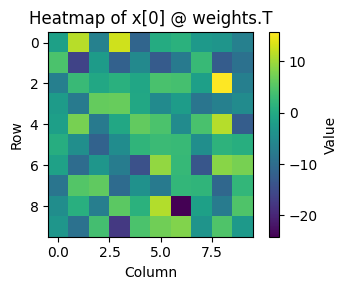

tensor(2)


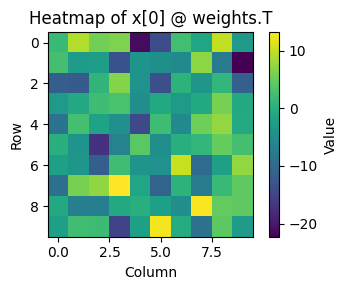

tensor(2)


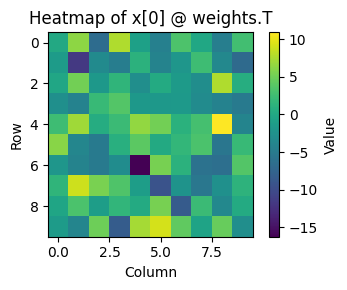

tensor(2)


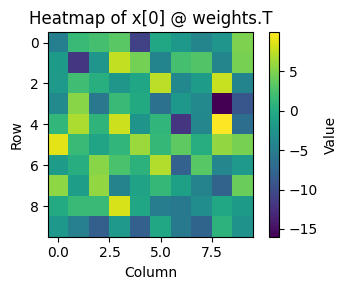

tensor(2)


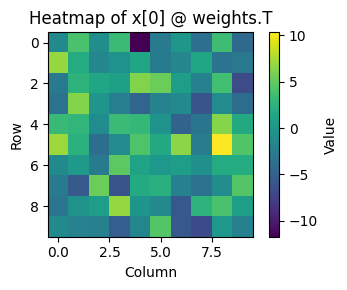

tensor(2)


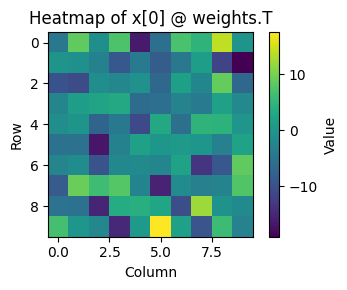

tensor(2)


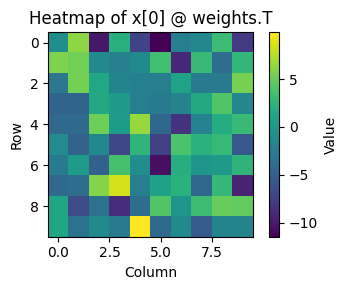

tensor(2)


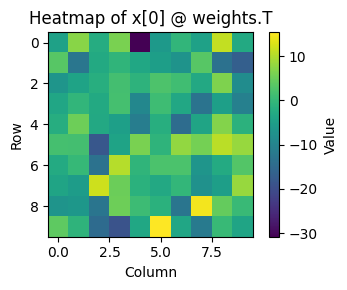

In [7]:
for i in range(100):
    # if true label is 2, print the heatmap
    if test_labels[i] == 2:

        result = x[i] @ weights.T

        print(test_labels[i])

        result_reshaped = result.reshape(10, 10)

        plt.figure(figsize=(4, 3))
        plt.imshow(result_reshaped, cmap='viridis')
        plt.colorbar(label='Value')
        plt.title('Heatmap of x[0] @ weights.T')
        plt.xlabel('Column')
        plt.ylabel('Row')



        plt.tight_layout()
        plt.show()
